# Name: Pranav Pratyush
# Reg No: 21BAI10019

## LAB EXPERIMENT:
#### Implementation of association rule mining on a transactional dataset of your own.

# Simple Market basket analysis for the one really small and simple dataset which contains ~7500 observation of ~120 item’s transaction pattern. (Apriori algorithm)

In [39]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [40]:
# reading the dataset
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [43]:
print(df.shape)

(7501, 20)


## data preprocessing

In [44]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

# having a look at the top 10 customer's items list
print(trans[1:10])

(7501, 20)
[['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pasta' 'french fries' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['soup' 'light cream' 'shallot' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['fro

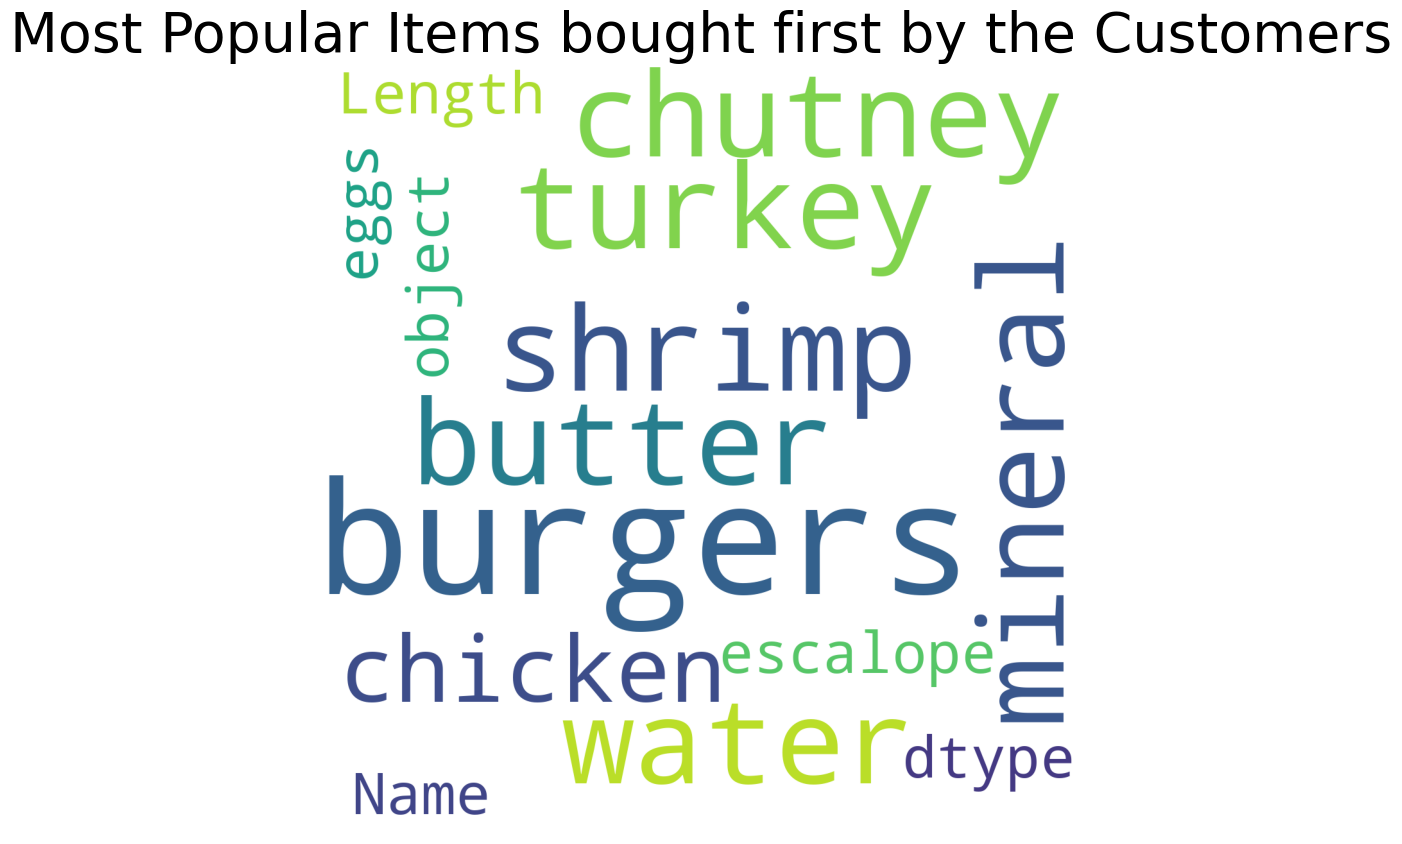

In [45]:
# word cloud
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200, height=1200, max_words=20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers', fontsize=40)
plt.show()

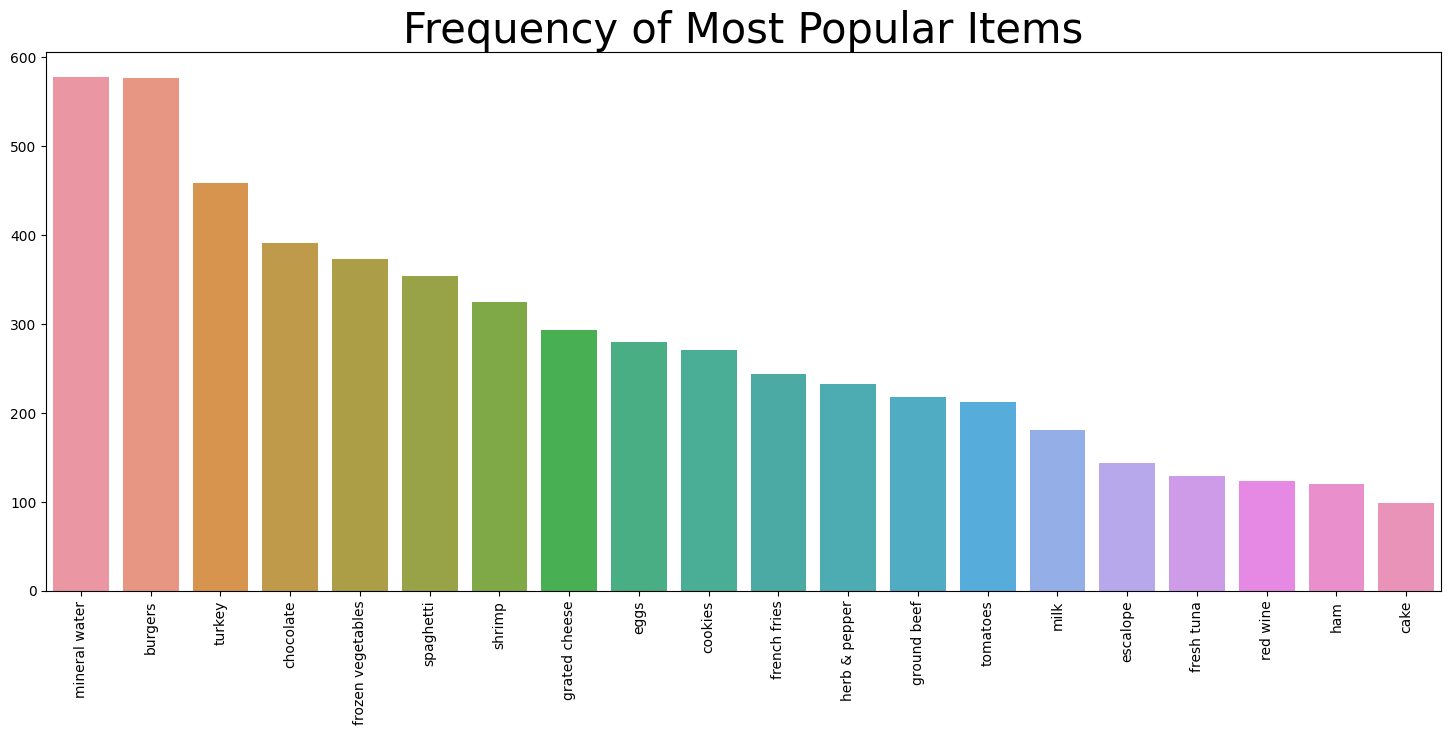

In [46]:
# frequency of most popular items
plt.rcParams['figure.figsize'] = (18, 7)
item_counts = df[0].value_counts().sort_values(ascending=False)[:20]
sns.barplot(x=item_counts.index, y=item_counts.values)
plt.title('Frequency of Most Popular Items', fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [47]:
# applying apriori rules to our dataset
trans = list(trans)
rules = apriori(trans, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)
results = list(rules)

In [48]:
# Visualizing the results
# Convert results to DataFrame
columns = ['Items', 'Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift']
result_df = pd.DataFrame(columns=columns)

for result in results:
    support = result[1]
    ordered_statistic = result[2]
    
    for item in ordered_statistic:
        antecedent = ', '.join(list(item[0]))
        consequent = ', '.join(list(item[1]))
        support_value = support
        confidence_value = item[2]
        lift_value = item[3]
        
        result_df = result_df.append(pd.Series([antecedent + ' => ' + consequent, antecedent, consequent, support_value, confidence_value, lift_value], index=columns), ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13872\4033754304.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.Series([antecedent + ' => ' + consequent, antecedent, consequent, support_value, confidence_value, lift_value], index=columns), ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13872\4033754304.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.Series([antecedent + ' => ' + consequent, antecedent, consequent, support_value, confidence_value, lift_value], index=columns), ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13872\4033754304.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.Series([an

C:\Users\HP\AppData\Local\Temp\ipykernel_13872\4033754304.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.Series([antecedent + ' => ' + consequent, antecedent, consequent, support_value, confidence_value, lift_value], index=columns), ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13872\4033754304.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.Series([antecedent + ' => ' + consequent, antecedent, consequent, support_value, confidence_value, lift_value], index=columns), ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13872\4033754304.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.Series([an

In [49]:
# Display the top 10 rules based on lift
top_rules_lift = result_df.sort_values(by='Lift', ascending=False).head(10)
print(top_rules_lift)

                                                 Items  \
344  frozen vegetables, soup => mineral water, nan,...   
177     frozen vegetables, soup => mineral water, milk   
349  nan, frozen vegetables, soup => mineral water,...   
173  frozen vegetables, olive oil => mineral water,...   
339  nan, frozen vegetables, olive oil => mineral w...   
336  frozen vegetables, olive oil => mineral water,...   
268  mineral water, whole wheat pasta => nan, olive...   
269  mineral water, whole wheat pasta, nan => olive...   
83       mineral water, whole wheat pasta => olive oil   
178     soup, milk => mineral water, frozen vegetables   

                                Antecedent                        Consequent  \
344                frozen vegetables, soup          mineral water, nan, milk   
177                frozen vegetables, soup               mineral water, milk   
349           nan, frozen vegetables, soup               mineral water, milk   
173           frozen vegetables, olive oi

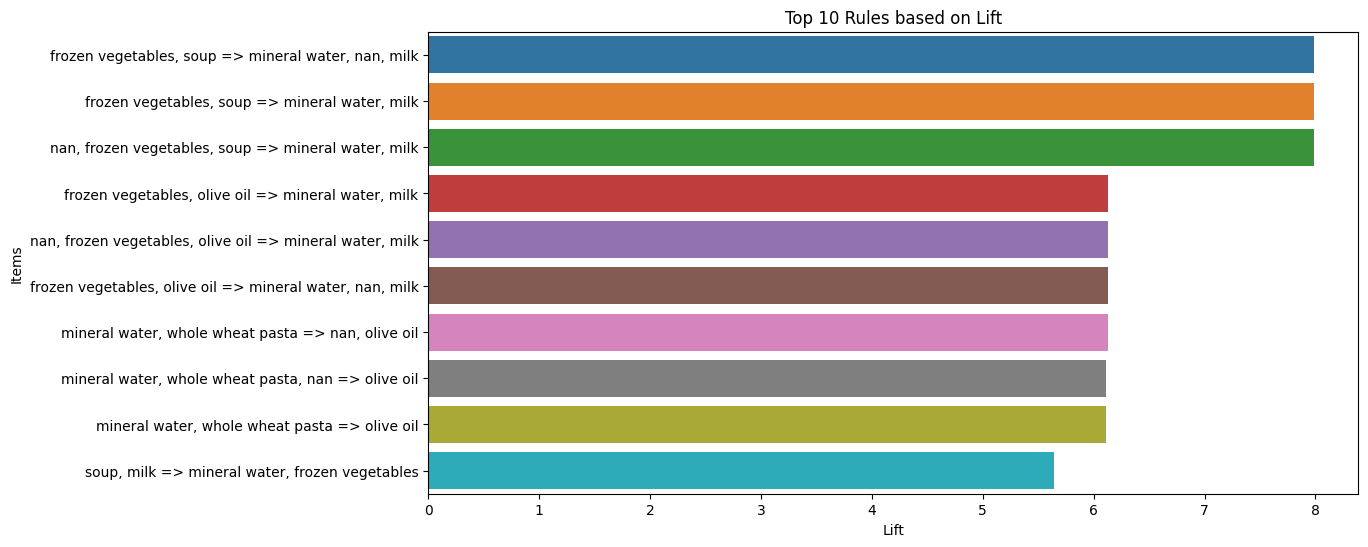

In [50]:
# Visualize the top 10 rules based on lift
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rules_lift['Lift'], y=top_rules_lift['Items'])
plt.title('Top 10 Rules based on Lift')
plt.xlabel('Lift')
plt.ylabel('Items')
plt.show()

## The top 10 rules, visualized through a bar plot, highlight associations with the highest lift values, indicating the strength of the relationships. These rules can be valuable for retailers in optimizing product placement, suggesting complementary items for promotions, and enhancing the overall customer shopping experience.